In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt

from rcpl.config import FIGURES_DIR, MPL_RC, DATA_DIR
from rcpl.experiment import Experiment

mpl.rcParams.update(MPL_RC)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [6]:
exp = Experiment(json_path=DATA_DIR / 'epsp_stress/measured/2023-11-23.json')
exp._load_json()
repr_ = ("geom", 17, 20)
epsp = exp.get_signal_representation(repr_, ['epsp'])[0]
stress = exp.get_signal_representation(repr_, ['stress'])[0]

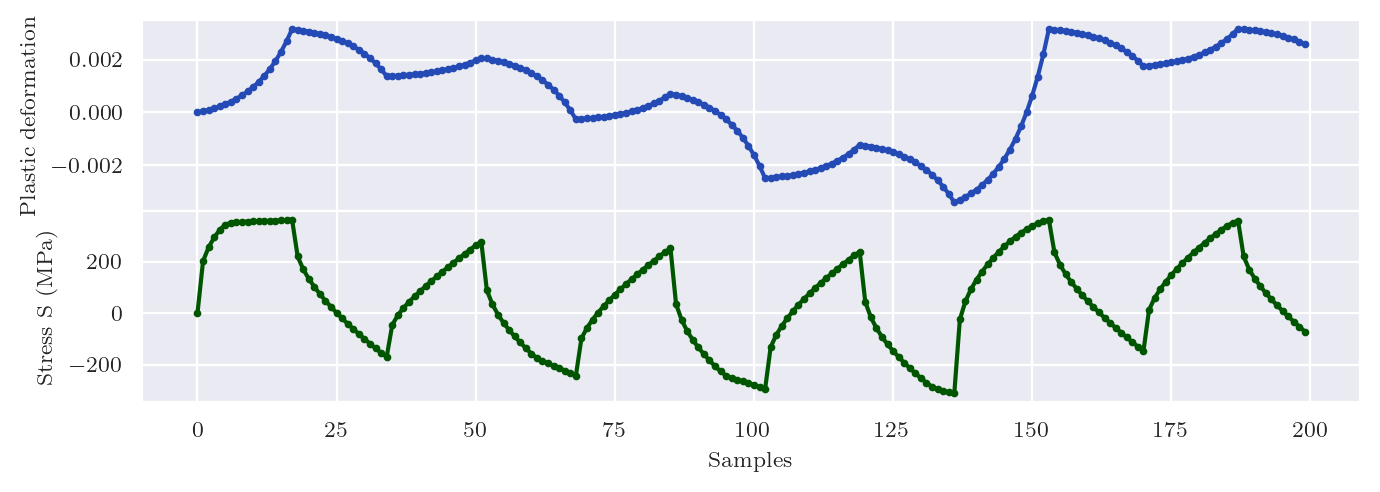

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(7, 2.5), dpi=200, sharex=True)  # figsize=(7, 1.85)
markersize = 3.5

col0 = '#005500'
col1 = '#dd0000'
col2 = '#244BB5'

axs[0].plot(epsp[:200], '.', color=col2, markersize=markersize)
axs[0].plot(epsp[:200], color=col2, label="experiment")
axs[0].set_ylabel('Plastic deformation')

axs[1].plot(stress[:200], color=col0, label="experiment")
axs[1].plot(stress[:200], '.', color=col0, markersize=markersize)
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Stress S (MPa)')

plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
fig.savefig(FIGURES_DIR / 'epsp_comparison_combined.pdf', bbox_inches='tight', pad_inches=0)
plt.show()